## PROJECT: Data wrangling & storing, analyzing, and visualizing  wrangled data



## Table of Contents
- [Introduction](#intro)
- [Part I - Gathering data](#gathering)
- [Part II - Assessing data](#assessingdata)
- [Part III - Cleaning data](#cleaning)
- [Part IV - Analyse and Visualize data](#analysevisualize)
- [Conclusion](#conclusion)


<a id='intro'></a>
### Introduction


The dataset that I will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though, Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

<a id='gatheringdata'></a>
#### Part I - Gathering data

To get started, let's import our libraries.

In [1]:
# Import of libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import shutil
import zipfile
import requests

In [7]:
# I obtained WeRateDogs Twitter archive. As it was downloaded to pre-defined folder Downloads, I used shutil to move it programmaticaly to target folder.

original=r'C:\Users\Miro\Downloads\twitter-archive-enhanced.csv'
target=r'C:\Data_analytics\UDACITY\WEEK 4\Project\twitter-archive-enhanced.csv'

shutil.move(original, target)

'C:\\Data_analytics\\UDACITY\\WEEK 4\\Project\\twitter-archive-enhanced.csv'

In [2]:
# Read the data from archive

archive_data=pd.read_csv('twitter-archive-enhanced.csv')
archive_data

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [3]:
# The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. 
# This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically.

url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)

In [4]:
# Save tsv file programmaticaly

with open("image-predictions.tsv", mode='wb') as file:
    file.write(response.content)

In [5]:
# Open tsv file

image_predictions=pd.read_csv('image-predictions.tsv', sep='\t')
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [6]:
# Read tweet_json.txt file. Each tweet's JSON data should be written to its own line.

tweet_json=pd.read_json('tweet-json_1.txt', lines=True)
tweet_json

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


<a id='assessingdata'></a>
#### Part II - Assessing data

After gathering each of the above pieces of data, datasets will be assessed visually and programmatically for quality and tidiness issues. Quality and tidiness issues will be detected and documented within this part. 

#### Visual and programmatic assessment: __archive_data__

__Visual assesment:__ 
* The dataset has 2 356 rows and 17 columns. It seems that dataset has many NaN values in certain columns. I should perform closer analysis what is behind Nan values - wrong download, missing value, etc. The columns related to 'name' of dog and dog 'stage' has None value. It is needed to closely analyse why it is so - wrong data extraction, missing values, etc.

* Nan values check is required in columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, timestamp
* None values check is required in columns: name and dog 'stage' (pupper, puppo, etc.)

__Programmatic assessment:__
* The whole dataset has 2 356 rows. Some columns show far less values than expected (in_reply_to_status_id, in_reply_to_user_id , retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp). 
* As a result of data type review of each column, following changes are required: a) 'timestamp' and 'retweeted_status_timestamp' should be datetime not object, b) the rest columns seems to have appropriate data type. 
* It seems that data extraction from text column was not right, as column 'name' has either None, 'a' value. The same problem is with dog 'stage' as many rows show None value-try to gather in one column.
* It seems that the rating extraction from text was not right. Based on info, nominator is almost always greater than 10, the column 'rating_nominator' shows rows (440 rows) where the rating is less than 10 (from zero to nine). Based on info, denominator is almost always 10, the column 'rating_denominator' shows that there are rows (23 rows) which are different to 10.
* Cehck for duplicity - tweet_id, retweets, etc.
* Url is part of text, extraction is possible here.
* There are retweets which need to be removed from dataset according to project requirements.

In [7]:
# Show the info table to check dtype, null-values, number of rows, columns, etc.
archive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

__Quality:__ 
* The column 'timestamp' is object. As it is time value, it will be converted to datetime.
* The columns rating_numerator and rating_denominator will be change to float in order to check posible decimals hidden.

__Tidiness:__
* The columns which will not be part of analysis will be dropped (in_reply_to_status_id , in_reply_to_user_id , retweeted_status_id ,retweeted_status_user_id, retweeted_status_timestamp).

In [8]:
# Show first rows of dataset
archive_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
# Show last rows of dataset
archive_data.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [10]:
# Show the number of observations which have 'None' or 'a' value instead of name of dog
archive_data.name.value_counts()

None            745
a                55
Charlie          12
Lucy             11
Oliver           11
               ... 
Sprinkles         1
Emanuel           1
Jaspers           1
Sweet             1
unacceptable      1
Name: name, Length: 957, dtype: int64

In [11]:
# Quick view on the text where name should be placed
no_names=archive_data.query('name=="None"')
no_names.text.value_counts()

13/10\n@ABC7                                                                                                                                          1
THIS WAS NOT HIS FAULT HE HAD NO IDEA. 11/10 STILL A VERY GOOD DOG https://t.co/GJ8rozumsy                                                            1
Honor to rate this dog. Lots of fur on him. Two massive tumors on back. Should get checked out. Very neat tho. 7/10 https://t.co/bMhs18elNF           1
Sharp dog here. Introverted. Loves purple. Not fun to pet. Hurts to cuddle with. 6/10 still good dog tho https://t.co/Dfv2YaHPMn                      1
Atlas is back and this time he's prettier than the sunset. Seems to be aware of it too. 13/10 would give modeling contract https://t.co/uRdKlFArQE    1
                                                                                                                                                     ..
Here's another picture without a dog in it. Idk why you guys keep sending these. 4/10 ju

In [12]:
# Quick view on the text where name should be placed
a_names=archive_data.query('name=="a"')
a_names.text.value_counts()

Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog https://t.co/rdivxLiqEt                   1
This is a baby Rand Paul. Curls for days. 11/10 would cuddle the hell out of https://t.co/xHXNaPAYRe                                                           1
This is a Sagitariot Baklava mix. Loves her new hat. 11/10 radiant pup https://t.co/Bko5kFJYUU                                                                 1
This is a spotted Lipitor Rumpelstiltskin named Alphred. He can't wait for the Turkey. 10/10 would pet really well https://t.co/6GUGO7azNX                     1
This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx                      1
Here is a horned dog. Much grace. Can jump over moons (dam!). Paws not soft. Bad at barking. 7/10 can still pet tho https://t.co/2Su7gmsnZm                    1
Guys this really needs to stop. We

__Qualitative:__ 
* There are 745 none values in terms of dog name. Based on visual inspection name are not included, only description or dog stage name was used.
* There are 55 'a' names as a result of not very good extraction of name as the real name followed by the description of the dog.

In [13]:
# Show the count of values for each dog stage
archive_data.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [14]:
# Show the count of values for each dog stage
archive_data.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [15]:
# Show the count of values for each dog stage
archive_data.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [16]:
# Show the count of values for each dog stage
archive_data.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

__Tidiness:__ 
* The data in four columns above, will be shown within one newly created column.

In [17]:
# Analysis of numerator rating column
# Change numerator column to float
archive_data['rating_numerator']=archive_data['rating_numerator'].astype(float)
archive_data.rating_numerator.value_counts()

12.0      558
11.0      464
10.0      461
13.0      351
9.0       158
8.0       102
7.0        55
14.0       54
5.0        37
6.0        32
3.0        19
4.0        17
1.0         9
2.0         9
15.0        2
0.0         2
420.0       2
75.0        2
26.0        1
88.0        1
84.0        1
165.0       1
182.0       1
60.0        1
17.0        1
99.0        1
1776.0      1
80.0        1
20.0        1
144.0       1
27.0        1
121.0       1
50.0        1
204.0       1
960.0       1
45.0        1
24.0        1
666.0       1
44.0        1
143.0       1
Name: rating_numerator, dtype: int64

In [18]:
# Filter text to quickly review what is behind numerator less than ten
filter_less_ten=archive_data['rating_numerator']<10
filter_applied=archive_data.loc[filter_less_ten, :]
print(filter_applied.text.value_counts())

This lil pup is Oliver. Hops around. Has wings but doesn't fly (lame). Annoying chirp. Won't catch tennis balls 2/10 https://t.co/DnhUw0aBM2                          1
This is Fido. He can tell the weather. Not good at fetch tho. Never comes when called. 4/10 would probably still pet https://t.co/4gOv2Q3iKP                          1
Very fit horned dog here. Looks powerful. Not phased by wind. Great beard. Big enough to ride? 6/10 would cuddle https://t.co/wwwYO9C9kl                              1
Marvelous dog here. Rad ears. Not very soft. Large tumor on nose. Has a pet rock. Good w kids. 6/10 overall neat pup https://t.co/g5YkRqP0dg                          1
This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1    1
                                                                                                                                                                

__Qualitative:__ 
* It seems that there are no decimals in rating. 
* Certain observations have numerator lower than 10, it seems that it was not a mistake and the numerator rating was in reality lower than ten. Some of them are retweets (RT) which will be removed in following part. Some are part of group evaluation of dogs (e.g. 5 dogs may receive rating for all of them together)

In [19]:
# Analysis of denominator rating column
# Change denominator column to float
archive_data['rating_denominator']=archive_data['rating_denominator'].astype(float)
archive_data.rating_denominator.value_counts()

10.0     2333
11.0        3
50.0        3
80.0        2
20.0        2
110.0       1
40.0        1
16.0        1
170.0       1
90.0        1
0.0         1
15.0        1
150.0       1
120.0       1
2.0         1
130.0       1
70.0        1
7.0         1
Name: rating_denominator, dtype: int64

In [20]:
# Check conversion to float
archive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   float64
 11  rating_denominator          2356 non-null   float64
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [21]:
# Filter text to quickly review what is behind denominator not equal to ten
filter_not_ten=archive_data['rating_denominator']!=10
filter_applied_denominator=archive_data.loc[filter_not_ten, :]
filter_applied_denominator.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960.0,0.0,None,None,None,None,None
342,832088576586297345,8.320875e+17,30582082.0,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11.0,15.0,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84.0,70.0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24.0,7.0,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9.0,11.0,None,None,None,None,None


In [22]:
print(filter_applied_denominator.text.value_counts())

Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa                                                                                           1
@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho                                                                           1
Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1                                                                                1
This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv                                     1
@docmisterio account started on 11/15/15                                                                                                                                     1
Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac

__Quality:__
* There are 23 observations where denominator is not equal to 10. It is seen, that copule of them are mistakes and some are calculated for more dogs e.g. 5 dogs got rating 60/50 -> 12/10 for one dog. It will need to be manually cleaned.

In [23]:
# The requirement not to include retweets in further analysis. Below observations are retweets and will be drop in cleaning part.
no_nan=archive_data['retweeted_status_id'].notnull()
f_no_nan=archive_data.loc[no_nan,:]
f_no_nan

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13.0,10.0,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12.0,10.0,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13.0,10.0,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14.0,10.0,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13.0,10.0,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10.0,10.0,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10.0,10.0,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12.0,10.0,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12.0,10.0,None,None,None,None,None


__Qualitative:__ 
* Retweets will be removed from the dataset.

In [24]:
# Rewiew of source column
archive_data['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

__Qualitative:__ In order to analyse source of observation, I will gather data into specific group, based on given source.

In [25]:
# Check for duplications
sum(archive_data['expanded_urls'].duplicated())

137

In [26]:
# Check for duplications
sum(archive_data['tweet_id'].duplicated())

0

#### Visual and programmatic assessment: __image_predictions__

__Visual assesment:__ 
* The dataset has 2 075 rows and 12 columns. Mix of lower and upper case in columns 'p1', 'p2' and 'p3'.
* The columns names p1, p2, p3 should be changed to give quick understanding what the columns include (be more descriptive).

__Programmatic assessment:__
* Some observations in the columns 'p1' to 'p3' include items which seem not to be dog breed, e.g. paper_towel, banana, orange, etc. This assumption is confirmed by False value in 'p1_dog' to 'p3_dog' columns.
* The dataset includes 2 075 observations which are non-null.
* Data type of each column seems to be appropriate.
* It seems that there are no duplicated tweet ids, but 66 duplicated pictures which will need to be removed.

In [27]:
# Quick overview of dataset
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


__Quality:__ The name of columns will be changed to more descriptive names. (e.g. p1= prediction_1)

In [28]:
# Show last rows of dataset
image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [29]:
# Show sample rows of dataset
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1443,775729183532220416,https://pbs.twimg.com/media/CsPxk85XEAAeMQj.jpg,1,web_site,0.989407,False,hand-held_computer,0.002139,False,menu,0.002115,False
518,676470639084101634,https://pbs.twimg.com/media/CWNOdIpWoAAWid2.jpg,1,golden_retriever,0.790386,True,borzoi,0.022885,True,dingo,0.015343,False
2053,887705289381826560,https://pbs.twimg.com/media/DFHDQBbXgAEqY7t.jpg,1,basset,0.821664,True,redbone,0.087582,True,Weimaraner,0.026236,True
1256,748568946752774144,https://pbs.twimg.com/ext_tw_video_thumb/74856...,1,Tibetan_terrier,0.328161,True,toy_poodle,0.304836,True,miniature_poodle,0.070878,True
1082,718454725339934721,https://pbs.twimg.com/media/Cfh2w6HWIAIIYAF.jpg,1,hammer,0.169865,False,hatchet,0.115744,False,chime,0.068092,False


In [30]:
# Breed count,  based on prediction 1
image_predictions.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
damselfly               1
studio_couch            1
giant_panda             1
earthstar               1
coffee_mug              1
Name: p1, Length: 378, dtype: int64

In [31]:
# Whether or not the #1 prediction is a breed of dog
image_predictions.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [32]:
# Breed count,  based on prediction 2
image_predictions.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
hummingbird             1
jigsaw_puzzle           1
grey_fox                1
purse                   1
shower_cap              1
Name: p2, Length: 405, dtype: int64

In [33]:
# Whether or not the prediction 2 is a breed of dog
image_predictions.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [34]:
# Breed count,  based on prediction 3
image_predictions.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
Indian_elephant        1
loupe                  1
space_shuttle          1
ox                     1
wolf_spider            1
Name: p3, Length: 408, dtype: int64

In [35]:
# Whether or not the prediction 3 is a breed of dog
image_predictions.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

__Tidiness:__  Create new final columns with the highest confidence level of what is on the picture as a result of value comparison in the columns p1, p2, p3.

In [36]:
# Check for duplicates
sum(image_predictions['tweet_id'].duplicated())

0

In [37]:
# Check for duplicates
sum(image_predictions['jpg_url'].duplicated())

66

__Qualitative:__ Remove duplicated observations.

#### Visual and programmatic assessment: __tweet_json__

__Visual assessment:__ 
* The dataset includes 2 354 observations and 31 columns. Some of them has missing values but belongs to columns which will not be part of analysis. The columns required (as minimum), 'id', 'retweet_count' and 'favorite_count' seem to be right at first sight assessment.


__Programmatical assessment:__
* The required columns as 'id', 'retweet_count' and 'favorite_count' do not have missing values and have appropriate data type assignated.
* The dataset has no duplicated tweet id observations.


In [38]:
# Quick overview of dataset
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

__Tidiness:__
* Remove the columns which are not used for the purpuse of the analysis.
* Change id to tweet_id in order to merge all datasets.

In [39]:
# Show first rows of dataset
tweet_json.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [40]:
# Show last rows of dataset
tweet_json.tail()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2353,2015-11-15 22:32:08+00:00,666020888022790149,666020888022790144,Here we have a Japanese Irish Setter. Lost eye...,False,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666020881337073664, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2535,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [41]:
# Check for duplicates
sum(tweet_json['id'].duplicated())

0

#### Quality issues (to be cleaned in the next section)

1. archive_data table: Datatype of the column 'timestamp'should be set as a datetime not as object. I will change the data type of this column to datetime.
* archive_data table: Retweets will be removed.
* archive_data table: The column 'rating_denominator' has 23 rows which are different to 10 (info based: equal to 10).
* archive_data table:The column 'source' will be groupped to four different groups.
* archive_data table: Remove columns which are not needed for the purposes of analysis (in_reply_to_status_id, in_reply_to_user_id , retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp)

* image_predictions table: Remove duplicated images.
* image_predictions table: The name of columns will be changed to more descriptive names. (e.g. p1= prediction_1)

* tweet_json table: The column 'id' should be changed to tweet_id (to be inline with the remaining datasets) in order to merge with other datasets. 
* tweet_json table: Remove columns which are not needed for the purposes of analysis (keep only tweet_id, retweet_count, favorite_count).

* archive_data table/ image_predictions table/tweet_json table: All datasets has different number of rows. As I would like to work with the final dataset with images, I will remove those rows in archive_data table/tweet_json which are not in image_prediciton table.

#### Tidiness issues (to be cleaned in the next section)

1. archive_data table: As the dataset includes several columns related to dog 'stage', I decided to create one separate column 'Dog_stage' to gather them all.

* Merge all three datasets to one master dataset (based on tweet_id column) called twitter_archive_master.

<a id='cleaningdata'></a>
#### Part III - Cleaning data

Clean each of the issues documented while assessing in order to get master data file used for further analysis.

In [42]:
# Create a copy of each data set
archive_data_clean=archive_data.copy()
image_predictions_clean=image_predictions.copy()
tweet_json_clean=tweet_json.copy()

### Cleaning: Qualitative issues

#### archive_data table: Datatype of the column 'timestamp'should be set as a datetime not as object.

#### Define

Datatype of the column 'timestamp'should be set as a datetime not as object. I will change the data type of this column to datetime using to_datime from pandas library.

#### Code

In [43]:
archive_data_clean['timestamp']=pd.to_datetime(archive_data_clean['timestamp'])

#### Test

In [44]:
archive_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   float64         

#### archive_data table: Retweets from archive_data will be removed.

#### Define

Based on requirements regarding retweets exclusion, retweets will be removed from dataset via drop.

#### Code

In [45]:
archive_data_clean.drop(archive_data_clean.loc[archive_data_clean['retweeted_status_id'].notnull()].index, inplace=True)



#### Test

In [46]:
no_nan=archive_data_clean['retweeted_status_id'].notnull()
f_no_nan=archive_data_clean.loc[no_nan,:]
f_no_nan

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### archive_data table: The column 'rating_denominator' has 23 rows which are different to 10 (info based: equal to 10).

#### Define

The column 'rating_denominator' has 23 rows which are different to 10 (info based: equal to 10). The problem behind wrong rating was that it was given to more than one dog. E.g. 5 dogs may obtained rating 60/50 which meant 12/10 per dog. I decided to list those observations. Manually adjust denominator and nominator and removed those observation which did not have any rating.

#### Code

In [47]:
with pd.option_context('max_colwidth', 200):
    filter_not_ten=archive_data_clean['rating_denominator']!=10
    filter_applied_denominator=archive_data_clean.loc[filter_not_ten, :]
    display(filter_applied_denominator[['tweet_id', 'rating_numerator', 'rating_denominator', 'text']])

,tweet_id,rating_numerator,rating_denominator,text
313,835246439529840640,960.0,0.0,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"
342,832088576586297345,11.0,15.0,@docmisterio account started on 11/15/15
433,820690176645140481,84.0,70.0,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
516,810984652412424192,24.0,7.0,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
902,758467244762497024,165.0,150.0,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
1068,740373189193256964,9.0,11.0,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ"
1120,731156023742988288,204.0,170.0,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
1165,722974582966214656,4.0,20.0,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
1202,716439118184652801,50.0,50.0,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
1228,713900603437621249,99.0,90.0,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1


In [48]:
# Adjust manually numerator and denominator rating

archive_data_clean.loc[(archive_data_clean.tweet_id==835246439529840640), 'rating_numerator']=13
archive_data_clean.loc[(archive_data_clean.tweet_id==835246439529840640), 'rating_denominator']=10

archive_data_clean.loc[(archive_data_clean.tweet_id==820690176645140481), 'rating_numerator']=12
archive_data_clean.loc[(archive_data_clean.tweet_id==820690176645140481), 'rating_denominator']=10

archive_data_clean.loc[(archive_data_clean.tweet_id==758467244762497024), 'rating_numerator']=11
archive_data_clean.loc[(archive_data_clean.tweet_id==758467244762497024), 'rating_denominator']=10

archive_data_clean.loc[(archive_data_clean.tweet_id==740373189193256964), 'rating_numerator']=14
archive_data_clean.loc[(archive_data_clean.tweet_id==740373189193256964), 'rating_denominator']=10

archive_data_clean.loc[(archive_data_clean.tweet_id==731156023742988288), 'rating_numerator']=12
archive_data_clean.loc[(archive_data_clean.tweet_id==731156023742988288), 'rating_denominator']=10

archive_data_clean.loc[(archive_data_clean.tweet_id==722974582966214656), 'rating_numerator']=13
archive_data_clean.loc[(archive_data_clean.tweet_id==722974582966214656), 'rating_denominator']=10

archive_data_clean.loc[(archive_data_clean.tweet_id==716439118184652801), 'rating_numerator']=11
archive_data_clean.loc[(archive_data_clean.tweet_id==716439118184652801), 'rating_denominator']=10

archive_data_clean.loc[(archive_data_clean.tweet_id==713900603437621249), 'rating_numerator']=11
archive_data_clean.loc[(archive_data_clean.tweet_id==713900603437621249), 'rating_denominator']=10

archive_data_clean.loc[(archive_data_clean.tweet_id==710658690886586372), 'rating_numerator']=10
archive_data_clean.loc[(archive_data_clean.tweet_id==710658690886586372), 'rating_denominator']=10

archive_data_clean.loc[(archive_data_clean.tweet_id==709198395643068416), 'rating_numerator']=9
archive_data_clean.loc[(archive_data_clean.tweet_id==709198395643068416), 'rating_denominator']=10

archive_data_clean.loc[(archive_data_clean.tweet_id==710658690886586372), 'rating_numerator']=12
archive_data_clean.loc[(archive_data_clean.tweet_id==710658690886586372), 'rating_denominator']=10

archive_data_clean.loc[(archive_data_clean.tweet_id==697463031882764288), 'rating_numerator']=11
archive_data_clean.loc[(archive_data_clean.tweet_id==697463031882764288), 'rating_denominator']=10

archive_data_clean.loc[(archive_data_clean.tweet_id==684225744407494656), 'rating_numerator']=11
archive_data_clean.loc[(archive_data_clean.tweet_id==684225744407494656), 'rating_denominator']=10

archive_data_clean.loc[(archive_data_clean.tweet_id==682962037429899265), 'rating_numerator']=10
archive_data_clean.loc[(archive_data_clean.tweet_id==682962037429899265), 'rating_denominator']=10

archive_data_clean.loc[(archive_data_clean.tweet_id==677716515794329600), 'rating_numerator']=12
archive_data_clean.loc[(archive_data_clean.tweet_id==677716515794329600), 'rating_denominator']=10

archive_data_clean.loc[(archive_data_clean.tweet_id==675853064436391936), 'rating_numerator']=11
archive_data_clean.loc[(archive_data_clean.tweet_id==675853064436391936), 'rating_denominator']=10

archive_data_clean.loc[(archive_data_clean.tweet_id==666287406224695296), 'rating_numerator']=9
archive_data_clean.loc[(archive_data_clean.tweet_id==666287406224695296), 'rating_denominator']=10

archive_data_clean.loc[(archive_data_clean.tweet_id==704054845121142784), 'rating_numerator']=12
archive_data_clean.loc[(archive_data_clean.tweet_id==704054845121142784), 'rating_denominator']=10


In [49]:
with pd.option_context('max_colwidth', 200):
    filter_not_ten=archive_data_clean['rating_denominator']!=10
    filter_applied_denominator=archive_data_clean.loc[filter_not_ten, :]
    display(filter_applied_denominator[['tweet_id', 'rating_numerator', 'rating_denominator', 'text']])

,tweet_id,rating_numerator,rating_denominator,text
342,832088576586297345,11.0,15.0,@docmisterio account started on 11/15/15
516,810984652412424192,24.0,7.0,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
1598,686035780142297088,4.0,20.0,"Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating"
1635,684222868335505415,121.0,110.0,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55
1663,682808988178739200,20.0,16.0,"I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible"


In [50]:
# Delete observation with no rating assignate (retweet, answer, etc.)
archive_data_clean.drop(archive_data_clean.loc[archive_data_clean['tweet_id']==832088576586297345].index, inplace=True)
archive_data_clean.drop(archive_data_clean.loc[archive_data_clean['tweet_id']==810984652412424192].index, inplace=True)
archive_data_clean.drop(archive_data_clean.loc[archive_data_clean['tweet_id']==686035780142297088].index, inplace=True)
archive_data_clean.drop(archive_data_clean.loc[archive_data_clean['tweet_id']==684222868335505415].index, inplace=True)
archive_data_clean.drop(archive_data_clean.loc[archive_data_clean['tweet_id']==682808988178739200].index, inplace=True)

#### Test

In [51]:
with pd.option_context('max_colwidth', 200):
    filter_not_ten=archive_data_clean['rating_denominator']!=10
    filter_applied_denominator=archive_data_clean.loc[filter_not_ten, :]
    display(filter_applied_denominator[['tweet_id', 'rating_numerator', 'rating_denominator', 'text']])

,tweet_id,rating_numerator,rating_denominator,text


In [52]:
archive_data_clean.info(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2170 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2170 non-null   int64              
 1   in_reply_to_status_id       75 non-null     float64            
 2   in_reply_to_user_id         75 non-null     float64            
 3   timestamp                   2170 non-null   datetime64[ns, UTC]
 4   source                      2170 non-null   object             
 5   text                        2170 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2115 non-null   object             
 10  rating_numerator            2170 non-null   float64         

#### archive_data table: Source divided to groups

#### Define

In order to get better overview regarding source of each observation, I will gather them to four specific groups. I will create new column showing the group to which source belong to.

#### Code

In [53]:
# Show value counts per each group
archive_data_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2037
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [54]:
# Define source groups
# twitter_for_iphone= '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
# vine_make_a_scene='<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>'
# twitter_web_client='<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'
# tweet_deck='<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'



In [55]:
# Set conditions to match the name for each group
conditions = [
    (archive_data_clean['source'] == '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'),
    (archive_data_clean['source'] == '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>'),
    (archive_data_clean['source'] == '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'),
    (archive_data_clean['source'] == '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>')]
choices = ['twitter_for_iphone', 'vine_make_a_scene', 'twitter_web_client', 'tweet_deck']
archive_data_clean['source_group'] = np.select(conditions, choices)


#### Test

In [56]:
archive_data_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source_group
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None,twitter_for_iphone


#### archive_data table: Remove columns which are not needed for the purposes of analysis 

#### Define

I will remove the columns not used for further analysis (in_reply_to_status_id, in_reply_to_user_id , retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp). I will use drop columns.

#### Code

In [57]:
# Check column names
archive_data_clean.columns.tolist()

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'source_group']

In [58]:
# Drop selected columns
archive_data_clean.drop(columns=['in_reply_to_status_id','in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)

#### Test

In [59]:
archive_data_clean.columns.tolist()

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'source_group']

#### image_predictions table: Remove duplicated images.



#### Define

Using drop function, remove duplicated images in image_prediction table.

#### Code

In [60]:
image_predictions_clean.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [61]:
# Filter duplicates
filter_jpg_duplicates=image_predictions_clean['jpg_url'].duplicated()
f_jpg_duplicity=image_predictions_clean.loc[filter_jpg_duplicates,:]
f_jpg_duplicity

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


In [62]:
image_predictions_clean.drop(f_jpg_duplicity.index, inplace=True)

#### Test

In [63]:
sum(image_predictions_clean['jpg_url'].duplicated())

0

#### image_predictions table: The name of columns will be changed to more descriptive names. (e.g. p1= prediction_1)

#### Define

The image_prediction table includes columns which  are not appropriately descriptive. I will change p1 to prediction_1, p2 to prediction_2, p3_prediciton_3.

#### Code

In [64]:
image_predictions_clean.rename(columns={'p1':'prediction_1', 'p2': 'prediction_2', 'p3': 'prediction_3'}, inplace=True)

#### Test

In [65]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,prediction_1,p1_conf,p1_dog,prediction_2,p2_conf,p2_dog,prediction_3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### tweet_json table: The column 'id' should be changed to tweet_id (to be inline with the remaining datasets) in order to merge with other datasets.

#### Define

I will change the column name 'id' to 'tweet_id' as it will help to merge the table with two other datasets.

#### Code

In [66]:
tweet_json_clean.rename(columns={'id':'tweet_id'}, inplace=True)

#### Test

In [67]:
tweet_json_clean.head(1)

,created_at,tweet_id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


#### tweet_json table: Remove columns which are not needed for the purposes of analysis (keep only tweet_id, retweet_count, favorite_count).

#### Define

Remove columns which are not required for the purpose of analysis. Required columns: id, retweet_count, favorite_count. The rest of columns will be deleted via drop function.

#### Code

In [68]:
tweet_json_clean.drop(columns=['created_at','id_str','full_text','truncated','display_text_range','entities','extended_entities','in_reply_to_status_id',
                               'in_reply_to_status_id_str','in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'geo', 'coordinates', 'place', 'contributors', 'possibly_sensitive',
                              'possibly_sensitive_appealable', 'retweeted_status', 
                               'quoted_status_id', 'quoted_status_id_str', 'quoted_status'], inplace=True)

In [69]:
tweet_json_clean.drop(columns=['source', 'is_quote_status', 'lang', 'favorited', 'retweeted'], inplace=True)

#### Test

In [70]:
tweet_json_clean.columns.tolist()

['tweet_id', 'user', 'retweet_count', 'favorite_count']

In [71]:
tweet_json_clean.head(1)

,tweet_id,user,retweet_count,favorite_count
0,892420643555336193,"{'id': 4196983835, 'id_str': '4196983835', 'na...",8853,39467


### Cleaning: Tidiness issues

#### archive_data table: Create one separate column 'Dog_stage' to gather four separate columns.

#### Define

The dataset has four columns representing four stages of dog. I will use melt to reshape dataset in order to list all dog stages within one column.

#### Code

In [72]:
###doggo, floffer, pupper, puppo into one column dog_stage

In [73]:
columns=archive_data_clean.columns.tolist()
columns

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'source_group']

In [74]:
# Use melt to reshape dataset
archive_data_clean=pd.melt(archive_data_clean, id_vars=['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name','source_group'], var_name='dog', value_name='dog_stage')

In [75]:
archive_data_clean.drop('dog',1, inplace=True)

In [76]:
sum(archive_data_clean['tweet_id'].duplicated())

6510

In [77]:
# Filter duplicates
duplicates_dogs=archive_data_clean.tweet_id.duplicated()
filter_duplicates_dog=archive_data_clean.loc[duplicates_dogs, :]
filter_duplicates_dog

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,source_group,dog_stage
2170,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,twitter_for_iphone,None
2171,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,twitter_for_iphone,None
2172,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,twitter_for_iphone,None
2173,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,twitter_for_iphone,None
2174,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,twitter_for_iphone,None
...,...,...,...,...,...,...,...,...,...,...
8675,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,None,twitter_for_iphone,None
8676,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10.0,a,twitter_for_iphone,None
8677,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10.0,a,twitter_for_iphone,None
8678,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,a,twitter_for_iphone,None


In [78]:
# Sort values
archive_data_clean=archive_data_clean.sort_values('dog_stage')


In [79]:
# Drop duplicates
archive_data_clean=archive_data_clean.drop_duplicates(subset='tweet_id', keep='last')
archive_data_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,source_group,dog_stage
2091,667437278097252352,2015-11-19 20:20:22+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Never seen this breed before. Very pointy pup....,https://twitter.com/dog_rates/status/667437278...,10.0,10.0,None,twitter_for_iphone,None
2090,667443425659232256,2015-11-19 20:44:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6.0,10.0,None,twitter_for_iphone,None
2089,667453023279554560,2015-11-19 21:22:56+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11.0,10.0,Cupcake,twitter_web_client,None
2088,667455448082227200,2015-11-19 21:32:34+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Reese and Twips. Reese protects Twips....,https://twitter.com/dog_rates/status/667455448...,7.0,10.0,Reese,twitter_web_client,None
2087,667470559035432960,2015-11-19 22:32:36+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a northern Wahoo named Kohl. He runs t...,https://twitter.com/dog_rates/status/667470559...,11.0,10.0,a,twitter_web_client,None
...,...,...,...,...,...,...,...,...,...,...
7026,793195938047070209,2016-10-31 21:00:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Lily. She's pupset that her costu...,https://twitter.com/dog_rates/status/793195938...,12.0,10.0,Lily,twitter_for_iphone,puppo
6967,803773340896923648,2016-11-30 01:31:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Diogi. He fell in the pool as soon as ...,https://twitter.com/dog_rates/status/803773340...,12.0,10.0,Diogi,twitter_for_iphone,puppo
6845,825026590719483904,2017-01-27 17:04:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Pablo. He's one gorgeous puppo. A...,https://www.gofundme.com/my-puppys-double-cata...,12.0,10.0,Pablo,twitter_for_iphone,puppo
7104,780931614150983680,2016-09-28 00:46:20+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I want to finally rate this iconic puppo who t...,https://twitter.com/dog_rates/status/780931614...,13.0,10.0,None,twitter_for_iphone,puppo


#### Test

In [80]:
archive_data_clean['dog_stage'].value_counts()

None       1826
pupper      234
doggo        75
puppo        25
floofer      10
Name: dog_stage, dtype: int64

#### Merge all three datasets to one master dataset (based on tweet_id column) called twitter_archive_master.

#### Define

I will merge all three datasets to one master dataset, which will be used for further analysis in Part IV.

#### Code

In [81]:
# Overview of dataset
archive_data_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,source_group,dog_stage
2091,667437278097252352,2015-11-19 20:20:22+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Never seen this breed before. Very pointy pup....,https://twitter.com/dog_rates/status/667437278...,10.0,10.0,None,twitter_for_iphone,None


In [82]:
# List current columns
archive_data_clean.columns.tolist()

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'source_group',
 'dog_stage']

In [83]:
# Overview of dataset
image_predictions_clean.head(1)

,tweet_id,jpg_url,img_num,prediction_1,p1_conf,p1_dog,prediction_2,p2_conf,p2_dog,prediction_3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [84]:
# Overview of dataset
tweet_json_clean.head(1)

,tweet_id,user,retweet_count,favorite_count
0,892420643555336193,"{'id': 4196983835, 'id_str': '4196983835', 'na...",8853,39467


In [85]:
tweet_json_clean.columns.tolist()

['tweet_id', 'user', 'retweet_count', 'favorite_count']

In [86]:
# Print number of rows and columns of selected datasets
print(archive_data_clean.shape)
print(image_predictions_clean.shape)
print(tweet_json_clean.shape)


(2170, 10)
(2009, 12)
(2354, 4)


In [87]:
# I will merge archive_data_clean to image_predictions and tweet_json_clean to previously merged dataset in order to create master dataset

id_names=archive_data_clean[['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'source_group',
 'dog_stage']]
image_predictions_clean=pd.merge(image_predictions, id_names, on=['tweet_id'])

In [88]:
id_names_t=tweet_json_clean[['tweet_id', 'user', 'retweet_count', 'favorite_count']]
image_predictions_clean=pd.merge(image_predictions_clean, id_names_t, on=['tweet_id'])

In [89]:
twitter_archive_master=image_predictions_clean.copy()

#### Test

In [90]:
# Master dataset overview
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 1991
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1992 non-null   int64              
 1   jpg_url             1992 non-null   object             
 2   img_num             1992 non-null   int64              
 3   p1                  1992 non-null   object             
 4   p1_conf             1992 non-null   float64            
 5   p1_dog              1992 non-null   bool               
 6   p2                  1992 non-null   object             
 7   p2_conf             1992 non-null   float64            
 8   p2_dog              1992 non-null   bool               
 9   p3                  1992 non-null   object             
 10  p3_conf             1992 non-null   float64            
 11  p3_dog              1992 non-null   bool               
 12  timestamp           1992 non-null 

In [91]:
# Store the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv.
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

<a id='analysevisialise'></a>
### Part IV - Analyse and visualize data
Analyze and visualize your wrangled data in your wrangle_act.ipynb Jupyter Notebook. At least three (3) insights and one (1) visualization must be produced.

##### Research Part 1: What features are associated with popular dog stage?

##### Research Part 2: What are the prefferencies for source?


##### Research Part 3: What are most often used dog names? 

#### Research Part 1: What features are associated with popular dog stage?

In [92]:
# Use descriptive statistics to evaluate selected columns
twitter_archive_master[['rating_numerator', 'retweet_count', 'favorite_count']].describe()

,rating_numerator,retweet_count,favorite_count
count,1992.000000,1992.000000,1992.000000
mean,11.695281,2767.915663,8899.560743
std,40.686944,4676.901456,12218.695739
min,0.000000,16.000000,81.000000
25%,10.000000,623.750000,1978.500000
50%,11.000000,1354.500000,4130.500000
75%,12.000000,3221.000000,11315.500000
max,1776.000000,79515.000000,132810.000000


In [93]:
# Filter only data not equal to None
no_values=twitter_archive_master['dog_stage']!="None"
filter_dog_stage=twitter_archive_master.loc[no_values]
filter_dog_stage

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,text,expanded_urls,rating_numerator,rating_denominator,name,source_group,dog_stage,user,retweet_count,favorite_count
331,672160042234327040,https://pbs.twimg.com/media/CVP9_beUEAAwURR.jpg,1,pug,0.561027,True,French_bulldog,0.222114,True,Labrador_retriever,...,This is Bubba. He's a Titted Peebles Aorta. Ev...,https://twitter.com/dog_rates/status/672160042...,8.0,10.0,Bubba,twitter_for_iphone,pupper,"{'id': 4196983835, 'id_str': '4196983835', 'na...",395,918
333,672205392827572224,https://pbs.twimg.com/media/CVQnPMrVAAAzShR.jpg,1,carton,0.952613,False,crate,0.035376,False,pug,...,This is Opal. He's a Royal John Coctostan. Rea...,https://twitter.com/dog_rates/status/672205392...,9.0,10.0,Opal,twitter_for_iphone,pupper,"{'id': 4196983835, 'id_str': '4196983835', 'na...",1270,2414
339,672254177670729728,https://pbs.twimg.com/media/CVRTmz1WcAA4uMF.jpg,1,pug,0.979487,True,French_bulldog,0.016850,True,Norwegian_elkhound,...,This is Rolf. He's having the time of his life...,https://twitter.com/dog_rates/status/672254177...,11.0,10.0,Rolf,twitter_for_iphone,pupper,"{'id': 4196983835, 'id_str': '4196983835', 'na...",800,1515
346,672481316919734272,https://pbs.twimg.com/media/CVUiMUeW4AEQgkU.jpg,1,Border_collie,0.599454,True,collie,0.106227,True,Shetland_sheepdog,...,Say hello to Jazz. She should be on the cover ...,https://twitter.com/dog_rates/status/672481316...,12.0,10.0,Jazz,twitter_for_iphone,pupper,"{'id': 4196983835, 'id_str': '4196983835', 'na...",137,757
353,672594978741354496,https://pbs.twimg.com/media/CVWJkJXWsAInlZl.jpg,1,Great_Pyrenees,0.755945,True,Old_English_sheepdog,0.082337,True,Afghan_hound,...,Meet Scott. Just trying to catch his train to ...,https://twitter.com/dog_rates/status/672594978...,9.0,10.0,Scott,twitter_for_iphone,pupper,"{'id': 4196983835, 'id_str': '4196983835', 'na...",661,1411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1954,884162670584377345,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,1,German_shepherd,0.707046,True,malinois,0.199396,True,Norwegian_elkhound,...,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12.0,10.0,Yogi,twitter_for_iphone,doggo,"{'id': 4196983835, 'id_str': '4196983835', 'na...",3128,20771
1963,886366144734445568,https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg,1,French_bulldog,0.999201,True,Chihuahua,0.000361,True,Boston_bull,...,This is Roscoe. Another pupper fallen victim t...,https://twitter.com/dog_rates/status/886366144...,12.0,10.0,Roscoe,twitter_for_iphone,pupper,"{'id': 4196983835, 'id_str': '4196983835', 'na...",3316,21524
1977,889531135344209921,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden_retriever,0.953442,True,Labrador_retriever,0.013834,True,redbone,...,This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13.0,10.0,Stuart,twitter_for_iphone,puppo,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2321,15359
1979,889665388333682689,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1,Pembroke,0.966327,True,Cardigan,0.027356,True,basenji,...,Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13.0,10.0,None,twitter_for_iphone,puppo,"{'id': 4196983835, 'id_str': '4196983835', 'na...",8538,38818


In [104]:
# Show value counts per each dog stage
filter_dog_stage.dog_stage.value_counts()

pupper     212
doggo       63
puppo       23
floofer      8
Name: dog_stage, dtype: int64

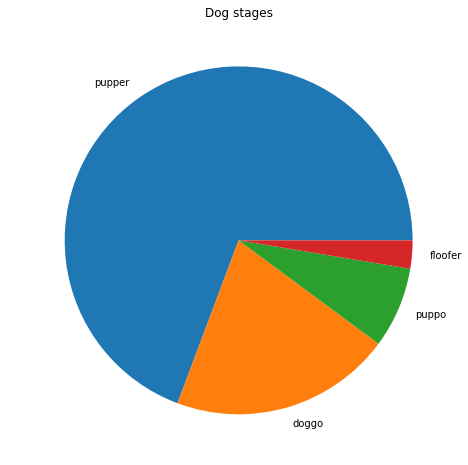

In [94]:
# Show pie chart
filter_dog_stage.dog_stage.value_counts().plot(kind='pie', figsize=(8,8))
plt.title('Dog stages')
plt.ylabel(' ');

In [95]:
# Detail of numerator rating
print(filter_dog_stage.groupby('dog_stage').rating_numerator.mean().sort_values(ascending=False))
print(filter_dog_stage.groupby('dog_stage').rating_numerator.max().sort_values(ascending=False))
print(filter_dog_stage.groupby('dog_stage').rating_numerator.min().sort_values(ascending=False))

dog_stage
puppo      12.043478
doggo      11.888889
floofer    11.875000
pupper     10.726415
Name: rating_numerator, dtype: float64
dog_stage
pupper     27.0
doggo      14.0
puppo      14.0
floofer    13.0
Name: rating_numerator, dtype: float64
dog_stage
floofer    10.0
puppo       9.0
doggo       8.0
pupper      3.0
Name: rating_numerator, dtype: float64


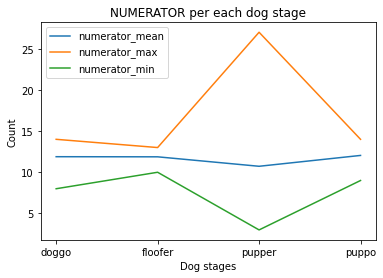

In [96]:
# NUMERATOR per each dog stage (mean, max, min)
numerator_mean=filter_dog_stage.groupby('dog_stage').rating_numerator.mean()
numerator_max=filter_dog_stage.groupby('dog_stage').rating_numerator.max()
numerator_min=filter_dog_stage.groupby('dog_stage').rating_numerator.min()


# Use_index location for x-axis
index_numerator1 = numerator_mean.index
index_numerator2 = numerator_max.index
index_numerator3= numerator_min.index

#x1, y1 for mean data; x2, y2 for median data
x1, y1 = index_numerator1, numerator_mean
x2, y2 = index_numerator2, numerator_max
x3, y3 = index_numerator3, numerator_min

#plot line chart for mean and median
plt.plot(x1, y1, label = 'numerator_mean')
plt.plot(x2, y2, label = 'numerator_max')
plt.plot(x3, y3, label = 'numerator_min')

# title and labels
plt.ylabel('Count')
plt.xlabel('Dog stages')
plt.title('NUMERATOR per each dog stage')

#legend
# legend
plt.legend();

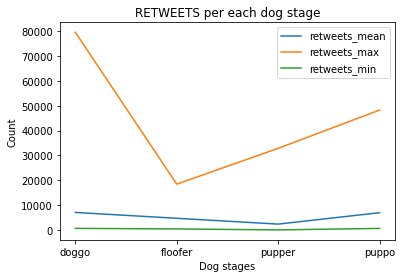

In [97]:
# RETWEETS per each dog stage (mean, max, min)
retweets_mean=filter_dog_stage.groupby('dog_stage').retweet_count.mean()
retweets_max=filter_dog_stage.groupby('dog_stage').retweet_count.max()
retweets_min=filter_dog_stage.groupby('dog_stage').retweet_count.min()


# Use_index location for x-axis
index_retweets1 = retweets_mean.index
index_retweets2 = retweets_max.index
index_retweets3 = retweets_min.index

#x1, y1 for mean data; x2, y2,  for median data
x1, y1 = index_retweets1, retweets_mean
x2, y2 = index_retweets2, retweets_max
x3, y3 = index_retweets3, retweets_min

#plot line chart for mean and median
plt.plot(x1, y1, label = 'retweets_mean')
plt.plot(x2, y2, label = 'retweets_max')
plt.plot(x3, y3, label = 'retweets_min')

# title and labels
plt.ylabel('Count')
plt.xlabel('Dog stages')
plt.title('RETWEETS per each dog stage')

#legend
# legend
plt.legend();

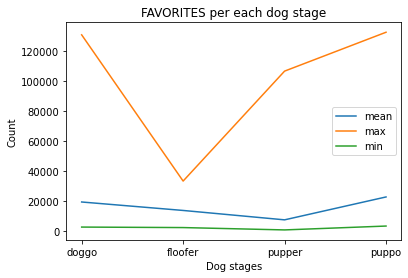

In [98]:
# FAVORITES per each dog stage (mean, max, min)
favorites_mean=filter_dog_stage.groupby('dog_stage').favorite_count.mean()
favorites_max=filter_dog_stage.groupby('dog_stage').favorite_count.max()
favorites_min=filter_dog_stage.groupby('dog_stage').favorite_count.min()


# Use_index location for x-axis
index_favorites1 = favorites_mean.index
index_favorites2 = favorites_max.index
index_favorites3 = favorites_min.index

#x1, y1 for mean data; x2, y2 for median data
x1, y1 = index_favorites1, favorites_mean
x2, y2 = index_favorites2, favorites_max
x3, y3 = index_favorites3, favorites_min

#plot line chart for mean and median
plt.plot(x1, y1, label = 'mean')
plt.plot(x2, y2, label = 'max')
plt.plot(x3, y3, label = 'min')

# title and labels
plt.ylabel('Count')
plt.xlabel('Dog stages')
plt.title('FAVORITES per each dog stage')

#legend
# legend
plt.legend();

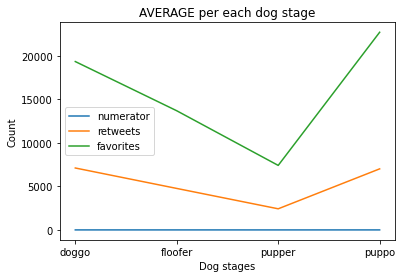

In [99]:
# AVERAGE per each dog stage for numerator, retweets and favorites
numerator_mean=filter_dog_stage.groupby('dog_stage').rating_numerator.mean()
retweet_mean=filter_dog_stage.groupby('dog_stage').retweet_count.mean()
favorite_mean=filter_dog_stage.groupby('dog_stage').favorite_count.mean()

# Use_index location for x-axis
index_numerator = numerator_mean.index
index_retweet = retweet_mean.index
index_favorite= favorite_mean.index

#x1, y1 for mean data; x2, y2 for median data
x1, y1 = index_numerator, numerator_mean
x2, y2 = index_retweet, retweet_mean
x3, y3 = index_favorite, favorite_mean

#plot line chart for mean and median
plt.plot(x1, y1, label = 'numerator')
plt.plot(x2, y2, label = 'retweets')
plt.plot(x3, y3, label = 'favorites')

# title and labels
plt.ylabel('Count')
plt.xlabel('Dog stages')
plt.title('AVERAGE per each dog stage')

#legend
# legend
plt.legend();

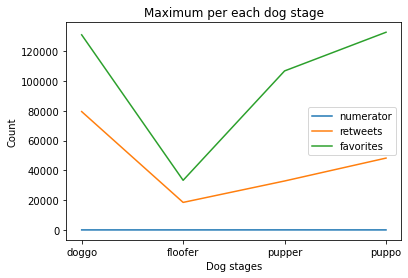

In [100]:
# MAXIMUM per each dog stage for numerator, retweets and favorites
numerator_max=filter_dog_stage.groupby('dog_stage').rating_numerator.max()
retweet_max=filter_dog_stage.groupby('dog_stage').retweet_count.max()
favorite_max=filter_dog_stage.groupby('dog_stage').favorite_count.max()

# Use_index location for x-axis
index_numerator = numerator_max.index
index_retweet = retweet_max.index
index_favorite= favorite_max.index

#x1, y1 for mean data; x2, y2 for median data
x1, y1 = index_numerator, numerator_max
x2, y2 = index_retweet, retweet_max
x3, y3 = index_favorite, favorite_max

#plot line chart for mean and median
plt.plot(x1, y1, label = 'numerator')
plt.plot(x2, y2, label = 'retweets')
plt.plot(x3, y3, label = 'favorites')

# title and labels
plt.ylabel('Count')
plt.xlabel('Dog stages')
plt.title('Maximum per each dog stage')

#legend
# legend
plt.legend();

__Conclusion:__ 
* Majority of dog stage represents pupper, followed by doggo, puppo and floffer.
* The __highest max and min values of numerator rating are within dog stage puppo.__ 
* The __highest max value of retweets is within doggo__, the lowest max value of retweets is within floofer.
* Doggo and puppo has comparable average favorites. The __highest max value of favorites is within puppo__ (more than 12 000), the lowest max value of favorites is within floofer (less than 4 000).
* We can see that development of favorites copies the development of retweets and numerator (see detail in numbers above). On average puppo has higher rating of favorites and numerator but doggo higher has counts of retweets.The lowest average rating has pupper (numerator rating cirka 10).
* Puppo and doggo have comparable max values in terms of favorites. Regarding retweets, doggo seems to have max value. The __poorest result have floofer__ in all three categories.

#### Research Part 2: What are the prefferencies for source?

In [101]:
# Count source prefferencies based on group
source_count=twitter_archive_master['source_group'].value_counts()
source_count

twitter_for_iphone    1953
twitter_web_client      28
tweet_deck              11
Name: source_group, dtype: int64

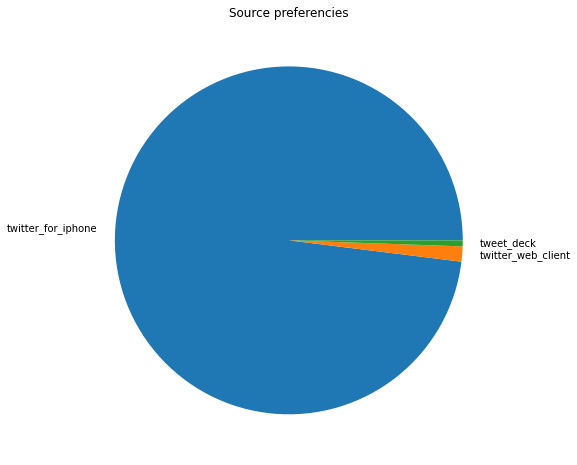

In [102]:
# Show results using pie chart
twitter_archive_master['source_group'].value_counts().plot(kind='pie', figsize=(8,8));

plt.title('Source preferencies')
plt.ylabel(' ');

__Conclusion:__ The most preffered option is to get to twitter via iphone.

#### Research Part 3: What are most often used dog names? 

In [106]:
# Show five most frequent dog names
name_counts=twitter_archive_master['name'].value_counts()
name_counts[2:7]

Charlie    11
Lucy       10
Oliver     10
Cooper     10
Penny       9
Name: name, dtype: int64

__Conclusion:__ The most frequently used dog names are Charlie, Cooper, Lucy, Oliver and Penny.

<a id='conclusion'></a>
### Conclusion

For conclusion, please refer to separate documents __act_report.pdf__ and __wrangle_report.pdf__.


Sources
[StackOverflow](https://stackoverflow.com/questions/19913659/pandas-conditional-creation-of-a-series-dataframe-column)
[Geeksforgeeks](https://www.geeksforgeeks.org/python-pandas-melt/)
[w3](https://www.w3resource.com/)